### Without optimisation

In [ ]:

import numpy as np # linear algebra
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv('Endo for ml.csv')  # Replace 'your_dataset.csv' with your actual file name

# Extract features (A, B, C) and labels
x = df[['A', 'B', 'C']]
y = df['D']


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0,shuffle=True)

**Support Vector machine# without optimizing**

Confusion Matrix is :
[[579  40]
 [514 117]]
0.5568
Roc_Score: 0.5603998064461622


<ipython-input-10-9279e1215a28>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


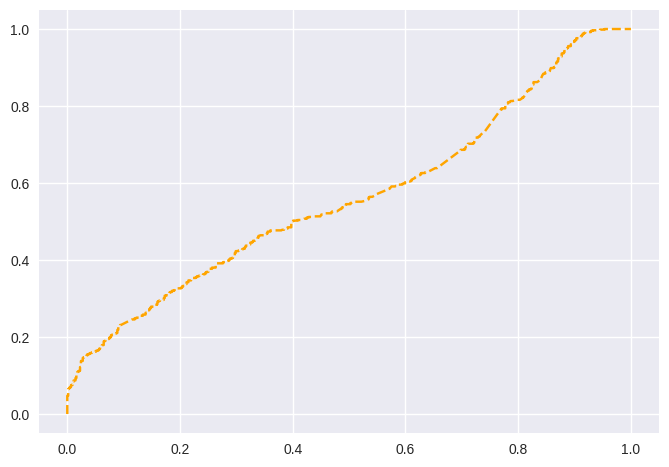

In [ ]:
## SVM classifier
## Accuracy 0.8260869565217391
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score

from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf',
                 random_state = 0,
                 probability = True)
classifier_SVM.fit(x_train, y_train)

y_pred = classifier_SVM.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
svm_acc_wo = accuracy_score(y_test, y_pred)
svm_prc_wo= precision_score(y_test, y_pred)
svm_f1_wo = f1_score(y_test, y_pred)
svm_auc_wo = roc_auc_score(y_test, y_pred)
fpr_svm_wo, tpr_svm_wo, thresh_svm_wo = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# ploting of AUC - ROC
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_svm_wo, tpr_svm_wo, linestyle='--',color='orange', label='SVM')
plt.save("plots/SVM_classic.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

**Decision Tree**

Confusion Matrix is :
[[137 482]
 [ 79 552]]
0.5512
Roc_Score: 0.5480633095146048


<ipython-input-11-0cf275f36c41>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


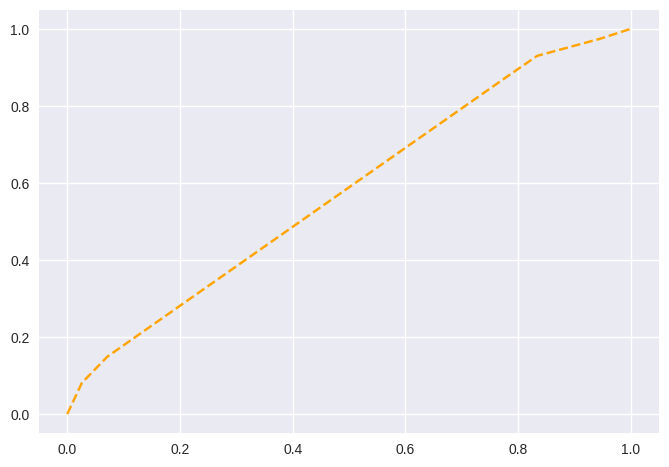

In [ ]:
## Decision Tree classifier
## Accuracy 0.9130434782608695

from sklearn.tree import DecisionTreeClassifier
classifier_DTC = DecisionTreeClassifier(max_depth=3)
classifier_DTC.fit(x_train, y_train)

y_pred = classifier_DTC.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
dtc_acc_wo = accuracy_score(y_test, y_pred)
dtc_prc_wo= precision_score(y_test, y_pred)
dtc_f1_wo = f1_score(y_test, y_pred)
dtc_auc_wo = roc_auc_score(y_test, y_pred)

from sklearn.metrics import roc_curve
pred_prob = classifier_DTC.predict_proba(x_test)
fpr_dtc_wo, tpr_dtc_wo, thresh_dtc_wo = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtc_wo, tpr_dtc_wo, linestyle='--',color='orange', label='DTC')
plt.save("plots/DT_classic.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

Gaussian Mixture Model

Confusion Matrix is :
[[443 176]
 [273 358]]
0.6408
Roc_Score: 0.6415119217387074


<ipython-input-12-0dd957512005>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


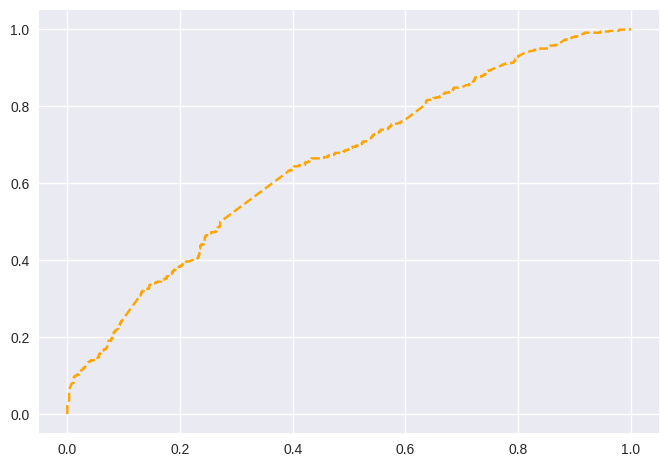

In [ ]:
## Gaussian Process Classifier
## Accuracy 0.8695652173913043
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
classifier_GPC = GaussianProcessClassifier(1.0 * RBF(1.0))
classifier_GPC.fit(x_train, y_train)
y_pred = classifier_GPC.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
gpc_acc_wo = accuracy_score(y_test, y_pred)
gpc_prc_wo= precision_score(y_test, y_pred)
gpc_f1_wo = f1_score(y_test, y_pred)
gpc_auc_wo = roc_auc_score(y_test, y_pred)
from sklearn.metrics import roc_curve
pred_prob = classifier_GPC.predict_proba(x_test)
fpr_gpc_wo, tpr_gpc_wo, thresh_gpc_wo = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_gpc_wo, tpr_gpc_wo, linestyle='--',color='orange', label='GPC')
plt.save("plots/GPC_classic.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

**MLP**

Confusion Matrix is :
[[410 209]
 [213 418]]
0.6624
Roc_Score: 0.6623996067477579


<ipython-input-13-0870057e0318>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


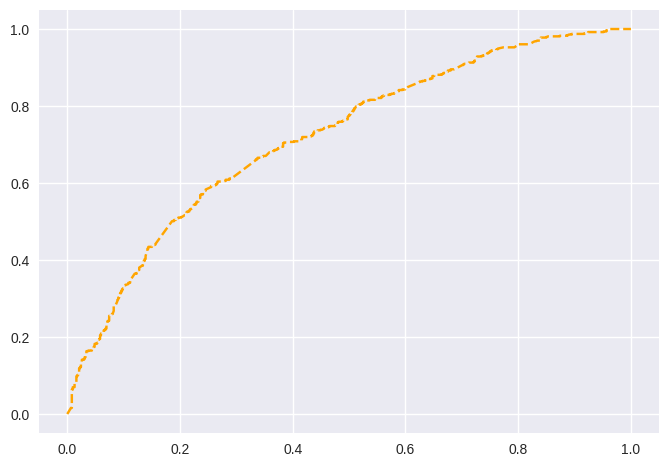

In [ ]:
## MLP Classifier
## Accuracy 0.8695652173913043
from sklearn.neural_network import MLPClassifier
classifier_MLP = MLPClassifier(alpha=1, max_iter=2000, learning_rate='adaptive')
classifier_MLP.fit(x_train, y_train)

y_pred = classifier_MLP.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
mlp_acc_wo = accuracy_score(y_test, y_pred)
mlp_prc_wo= precision_score(y_test, y_pred)
mlp_f1_wo = f1_score(y_test, y_pred)
mlp_auc_wo = roc_auc_score(y_test, y_pred)
from sklearn.metrics import roc_curve
pred_prob = classifier_MLP.predict_proba(x_test)
fpr_mlp_wo, tpr_mlp_wo, thresh_mlp_wo = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_mlp_wo, tpr_mlp_wo, linestyle='--',color='orange', label='MLP')
plt.save("plots/MLP_classic.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

**XG Boost**

In [ ]:
pip install xgboost

Confusion Matrix is :
[[531  88]
 [458 173]]
0.5632
Roc_Score: 0.5660016027077055


<ipython-input-14-e63a4619bf9b>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


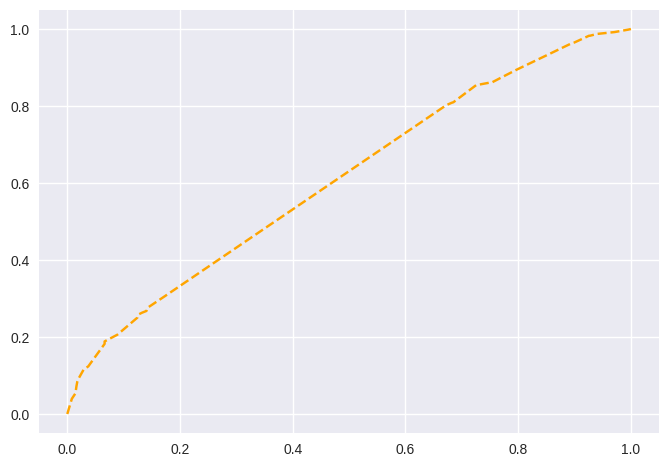

In [ ]:
## XGBoost
## Accuracy 0.9130434782608695

from xgboost import XGBClassifier
classifier_XGB = XGBClassifier(n_estimators=300, learning_rate=0.0001)
classifier_XGB.fit(x_train, y_train)

y_pred = classifier_XGB.predict(x_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
xgb_acc_wo = accuracy_score(y_test, y_pred)
xgb_prc_wo= precision_score(y_test, y_pred)
xgb_f1_wo = f1_score(y_test, y_pred)
xgb_auc_wo = roc_auc_score(y_test, y_pred)
pred_prob = classifier_XGB.predict_proba(x_test)
fpr_xgb_wo, tpr_xgb_wo, thresh_xgb_wo = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb_wo, tpr_xgb_wo, linestyle='--',color='orange', label='XGB')
plt.save("plots/XGB_classic.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

Ploting of AUC

<ipython-input-15-4b7cceffd5ba>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


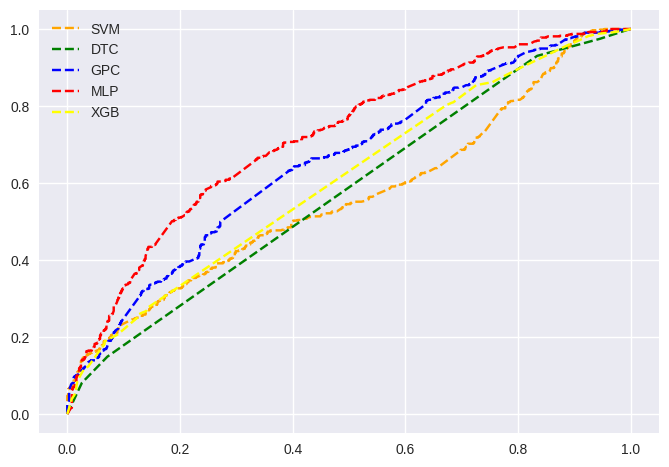

In [ ]:
# Combined ROC

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr_svm_wo, tpr_svm_wo, linestyle='--',color='orange', label='SVM')
plt.plot(fpr_dtc_wo, tpr_dtc_wo, linestyle='--',color='green', label='DTC')
plt.plot(fpr_gpc_wo, tpr_gpc_wo, linestyle='--',color='blue', label='GPC')
plt.plot(fpr_mlp_wo, tpr_mlp_wo, linestyle='--',color='red', label='MLP')
plt.plot(fpr_xgb_wo, tpr_xgb_wo, linestyle='--',color='yellow', label='XGB')
plt.save("plots/cum_classic.png")
plt.legend()

### **Summerise the results**

In [ ]:
models = pd.DataFrame({
    'Model': ['SVC', 'Decision Tree Classifier', 'Gaussian Process Classifier','Multilayer Perceptron','XgBoost'],
    'Accuracy': [svm_acc_wo, dtc_acc_wo, gpc_acc_wo,mlp_acc_wo , xgb_acc_wo],
    'Precision': [svm_prc_wo, dtc_prc_wo, gpc_prc_wo,mlp_prc_wo , xgb_prc_wo],
    'F1-Score': [svm_f1_wo, dtc_f1_wo, gpc_f1_wo,mlp_f1_wo , xgb_f1_wo],
    'AUC': [svm_auc_wo, dtc_auc_wo, gpc_auc_wo,mlp_auc_wo , xgb_auc_wo]
})
models.to_csv("metrics/classic.csv")
print(models)

                         Model  Accuracy  Precision  F1-Score       AUC
0                          SVC    0.5568   0.745223  0.296954  0.560400
1     Decision Tree Classifier    0.5512   0.533849  0.663063  0.548063
2  Gaussian Process Classifier    0.6408   0.670412  0.614592  0.641512
3        Multilayer Perceptron    0.6624   0.666667  0.664547  0.662400
4                      XgBoost    0.5632   0.662835  0.387892  0.566002
